# Sentiment Analysis of Restaurent Reviews 

Dataset is avaialable on Kaggle and yelp.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
data=pd.read_csv('Yelp.csv')

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.shape

(10000, 10)

### Importing Textblob
TextBlob is a library for processing textual data.

In [5]:
#pip install -u textblob

In [6]:
import nltk
from textblob import TextBlob

In [7]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
data['Polarity'] = data['text'].apply(get_polarity)

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.

In [8]:
data['Sentiment_Type']=''
data.loc[data.Polarity>0,'Sentiment_Type']='POSITIVE'
data.loc[data.Polarity==0,'Sentiment_Type']='NEUTRAL'
data.loc[data.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [9]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Polarity,Sentiment_Type
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,0.402469,POSITIVE
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,0.229773,POSITIVE
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,0.566667,POSITIVE
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,0.608646,POSITIVE
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,0.468125,POSITIVE


In [10]:
data.Sentiment_Type.value_counts()

POSITIVE    9103
NEGATIVE     802
NEUTRAL       95
Name: Sentiment_Type, dtype: int64

### Top 5 Positive, Neutal and Negative reviews

In [11]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = data.loc[data.Polarity == 1, ['text']].sample(5).values
for c in cl:
    print('--->',c[0])

5 random reviews with the highest positive sentiment polarity: 

---> Best sushi in town.
---> They are wonderful!
---> Ohhh this is the best place ever! Every thing I have ordered has been delish!
---> Excellent food and service!
---> Tasty Thai- is. But it could also be called Delicious Thai. And the service is always great!


In [12]:
print('5 random reviews with the highest Negative sentiment polarity: \n')
cl = data.loc[data.Polarity == -1, ['text']].sample(5).values
for c in cl:
    print('--->',c[0])

5 random reviews with the highest Negative sentiment polarity: 

---> Absolutely awful... these guys have NO idea what they are doing!
---> This was absolutely horrible. I got the supreme pizza with the mystery meats.  I threw it in the trash. I will wait until I get to my destination to eat. Horrible!!!
---> Horrible service.
---> Nasty workers and over priced trash
---> Very bad food!


In [13]:
print('5 random reviews with the highest Neutral sentiment polarity: \n')
cl = data.loc[data.Polarity == 0, ['text']].sample(5).values
for c in cl:
    print('--->',c[0])

5 random reviews with the highest Neutral sentiment polarity: 

---> All I can say is "yum!"
---> yuk! service and food sucked never a
gain!
---> X
---> I dream about their chopped salad...I, too, would use it as my screen saver if I didn't share a computer.
---> This bar is now "Dodey's". Sold just under a year ago. *See "Dodey's reviews.


# Visualization

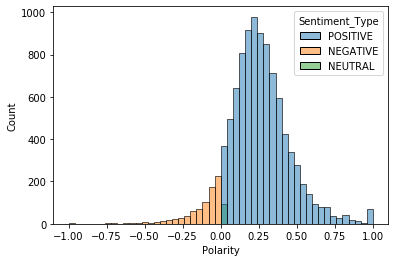

In [14]:
sns.histplot(data=data,x='Polarity',bins=50,kde=False,hue='Sentiment_Type')

Visualizing the count of Polarity.

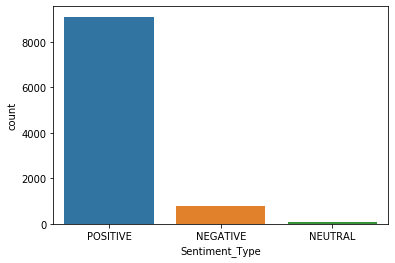

In [15]:
sns.countplot(x='Sentiment_Type',data=data)

Visualizing the count of Sentiment types.

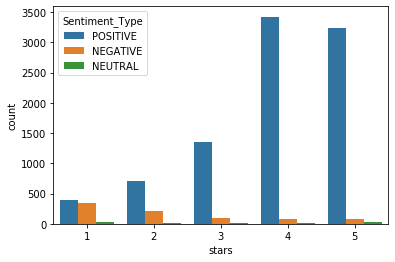

In [16]:
sns.countplot(x="stars", hue="Sentiment_Type", data=data)

Visualzing No of rating with Sentiment types.

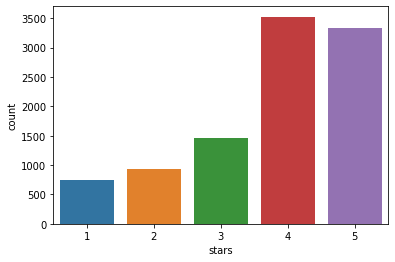

In [17]:
sns.countplot(data=data,x='stars')

Viusalzing ratings.

# Importing NLP libraries

In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Unigram (Which words are most used by the people)

In [19]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['text'], 20)
Unigram = pd.DataFrame(common_words, columns = ['Unigram' , 'Number of Occurence'])
Unigram

,Unigram,Number of Occurence
0,good,6801
1,place,6662
2,food,6184
3,great,5127
4,like,5041
5,just,4567
6,time,3504
7,really,3366
8,service,3169
9,ve,2594


# Bigram (Which two continous words are most used by the people)

In [20]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['text'], 20)
Bigram = pd.DataFrame(common_words, columns = ['Bigram' , 'Number of Occurence'])
Bigram

,Bigram,Number of Occurence
0,happy hour,604
1,really good,428
2,pretty good,388
3,great place,338
4,food good,337
5,ice cream,318
6,don know,300
7,love place,287
8,good food,276
9,great food,261


# Trigram (Which 3 continous words are most used by people)

In [21]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['text'], 20)
Trigram = pd.DataFrame(common_words, columns = ['Trigram' , 'Number of Occurence'])
Trigram

,Trigram,Number of Occurence
0,sweet potato fries,101
1,great food great,55
2,love love love,43
3,food pretty good,41
4,food great service,41
5,old town scottsdale,40
6,food good service,40
7,happy hour menu,38
8,good food good,38
9,great happy hour,38


#Visualzing the part of speech Tagging.

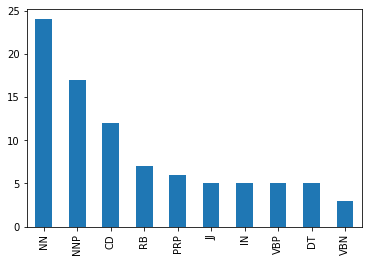

In [22]:
blob = TextBlob(str(data['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:10]
pos_df.plot(kind='bar')

In [23]:
data["Sentiment_Type"]=np.where(data["Sentiment_Type"]=='POSITIVE',1,0)

In [24]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Polarity,Sentiment_Type
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,0.402469,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,0.229773,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,0.566667,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,0.608646,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,0.468125,1


In [25]:
data.shape

(10000, 12)

In [26]:
data.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'Polarity', 'Sentiment_Type'],
      dtype='object')

In [27]:
columns=['business_id','date','review_id','stars','type','user_id','cool','useful','funny','Polarity']
data=data.drop(columns,axis=1)

In [28]:
data = data.sample(frac = 1)

In [29]:
data.head()

,text,Sentiment_Type
3540,This place is so damn tasty. I love a good bu...,1
3744,Ordered the Philly Egg Rolls. They came out st...,1
5234,"Wooot for ""grown up slushies!""\n\nThis place i...",1
7679,The name says it all. This family owned resta...,1
6915,Why would I go to a restaurant and hope for th...,1


# Cleaning text with Regular expression

In [33]:
#create a list which contain all the clean text.
corpus = []

for i in range(0,10000):
    review=re.sub('[^a-zA-Z]' , ' ',data['text'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopword=stopwords.words('english')
    all_stopword.remove('not') 
    review=[ps.stem(word) for word in review if not word in set(all_stopword)]
    review = ' '.join(review)
    corpus.append(review)


# Creating Bag of Models

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:,-1].values

In [35]:
#split the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# SGD Classifier

In [37]:
model1 = OneVsRestClassifier(SGDClassifier())
model1.fit(X_train, y_train)
model1.score(X_test, y_test)*100

84.8

In [38]:
test_prediction = model1.predict(X_test)

# Logistic Regression

In [39]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)*100

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


87.64999999999999

In [40]:
test_prediction = model2.predict(X_test)

# Random Forest Classifier

In [41]:
model3=RandomForestClassifier()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)*100

90.35

In [42]:
test_prediction = model3.predict(X_test)

# Support Vector Machine

In [43]:
model4 = SVC(kernel='rbf',random_state=0)
model4.fit(X_train, y_train)
model4.score(X_test, y_test)*100

90.35

In [44]:
test_prediction = model4.predict(X_test)

# Decision Tree

In [45]:
model5 = DecisionTreeClassifier(criterion='entropy',random_state=0)
model5.fit(X_train, y_train)
model5.score(X_test, y_test)*100

83.55

In [46]:
test_prediction = model5.predict(X_test)

# Multinomial NB

In [47]:
model6 = MultinomialNB()
model6.fit(X_train, y_train)
model6.score(X_test, y_test)*100

87.75

In [48]:
test_prediction = model6.predict(X_test)

# Testing the model by predicitng new reviews.

In [51]:
def review(new_review):
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = model3.predict(new_X_test)
    #print(new_y_pred)
    
    if new_y_pred == [1]:
        print('--> This review is Positive')
    else:
        print('--> This review is Negative')

In [52]:
new_review = input("Enter your review : ") 
review(new_review)

Enter your review : Had myself waiting but it was worth. Liked the food. Good availability of choices to order from and can ask for sauces of your choice. Quality was good as well. The chicken items were delicious. The chicken items were really delicious.
--> This review is Positive


In [53]:
new_review = input("Enter your review : ") 
review(new_review)

Enter your review : Food was bad
--> This review is Negative


In [54]:
new_review = input("Enter your review : ") 
review(new_review)

Enter your review : I have only availed the Home Delivery service specially when I have a craving for Chinese, I dial Red Chillies. I rate them high for Chinese dishes. Also, there is not much waiting time and the quantity of food is also good.
--> This review is Positive


In [55]:
new_review = input("Enter your review : ") 
review(new_review)

Enter your review : Ordered the chicken fried rice and chicken chilly dry.....i must say that they have the quality of food and the taste is average and the take away quantity is pretty good for two people and atleast eatable food but the part where it got bad was the under cooked chicken chilly dry which looked good but it was not cook properly....the taste was there but no one would love a under cooked chicken especially me!!! Will try something else and see if the 2nd chance was worth giving... :/
--> This review is Positive
